## Algorytmy grafowe – najkrótsza ścieżka w grafie


Patryk Łyczko, 406785 <br>
EAIiIB, <br>
22.03.2022 <br>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
## Algorytm Algorytm Bellmana-Forda
def Bellman_Ford(G, weight):
    ## G - graf
    ## weight - wagi


    ## Zmienne pomocnicze: d - lista wartosći dróg z wierzchołka 0, 
    # V - tablica wierzchołków G, V_len liczba wierzchołków
    d = []
    V = [i for i in G.keys()]
    V_len = len(V)

    ## ustawiamy wektor długości na wartości inf
    d = [np.inf] * (V_len + 1)
    d[V_len] = 0 # na ostatniej pozycji ustawiamy wartość 0, 
                #wartość ta jest poza liczba wierzchołków


    ## Będziemy dodawali do listy [wierzchołek, wierzchołek, waga miedzy wierzchołkami] 
    # aby otrzymać połączenia pomiędzy nimi
    ## interujemy po całej macierzy wag (weight) jeżeli waga nie wynosi 
    # inf albo 0 dodajemy ją do wektora
    val = []
    for i in range(V_len):
        for j in range(V_len):
            if weight[i][j] != np.inf and weight[i][j] != 0:
                val.append([i, j, weight[i][j]])
    ## Dodajemy dla naszych ostatnich miejsc połączenia o wagach 0
    ## Są to połączenia z wierzchołkiem 0 (dodanym na potrzeby algorytmu) 
    # z innymi, wagi ustawione na 0
    for i in range(V_len):
        val.append([V_len, i, 0])

    # Pętla przez wszystkie wierzchołki, dla każdego wierzchołka z połączeniami 
    # jezeli nie wynosi on inf oraz jezeli jego długosc i waga sa mniejsze
    # niz droga dla wierzchołka koncowego to ustaw droge do wierzcholka koncowego na to wartosc
    for i in range(V_len):
        for (star, meta, value) in val:
            if ((d[star] != np.inf) and (d[star] + value < d[meta])):
                d[meta] = d[star] + value

    ## Sprawdzenie cyklu ujemnego
    for (star, meta, value) in val:
            if ((d[star] != np.inf) and (d[star] + value < d[meta])):
                return []
    
    d.pop() ## usuwamy ostatni element z listy dla drogi do dodanego wierzchołka
    return d

In [14]:
def Dijkstra(G,weight, start):
    ## G - graf
    ## weight - macierz wag
    ## start - wierzchołek startowy

    ## Zmienne pomocnicze: V - wierzchołki G, 
    #                      d - droga do wierzchołka (wierzchołek: droga), 
    #                      p - połączenia (wierzchołek: wierzchołek)
    V = [i for i in G.keys()]
    d = {}
    p = {}

    #Ustawiamy długości dla wierzchołków na inf, a połączenia na wierzchołek 0
    for u in V:
        d[u] = np.inf
        p[u] = 0
        
    # Kopiujemy zmienna V, wyciagamy z niej wartosc startowa, ustawiamy 
    # droge do niego na 0 
    Q = V.copy()
    Q.remove(start)  
    d[start] = 0
    u_prime = start ## wierzchołek poprzedni

    ## Dopóki nie wykorzystaliśmy wszystkich wierzchołków 
    ## Dla każdego wierzchołka u należącego do Q i do G[u_prime] jeżeli wartosc
    #  drogi wierzch u_prime i wagi miedzy nim a u jest mniejsza
    ## niz wartosc drogi do u to ustaw ta wartosc jako droga do u
    ## Ustaw w słowniku p połączenie
    while len(Q) != 0:
        for u in Q:
            N = G[u_prime]
            if u in N:
                if d[u_prime] + weight[u_prime - 1, u - 1] < d[u]:
                    d[u] = d[u_prime] + weight[u_prime - 1, u - 1]
                    p[u] = u_prime

        ## Wybieramy najkrótsza droge i zapisujemy ją jako wierzchołek poprzedni
        min_val = np.inf
        for u in Q:  
            if d[u] < min_val:
                min_val = d[u]
                u_prime = u

        ## Usuwamy nowo wybrany wierzchołek
        Q.remove(u_prime)
        
    return d, p


In [15]:
def Johnsona(G, weight):
    ## G - graf
    ## weight - macierz wag

    ## Zmienne pomocnicze
    V = [i for i in G.keys()]
    V_len = len(V)

    ## Zwracany jest wektor do modyfikacji wag orginalnego grafu
    mod_Weig = Bellman_Ford(G, weight)


    ## Nowa macierz wag, zmieniamy wagi aby nie pojawiły się wagi ujemne
    mod_weight_graph = np.zeros((V_len,V_len))
    for i in range(V_len):
        for j in range(V_len):
            if weight[i][j] != 0:
                mod_weight_graph[i][j] = weight[i][j] + mod_Weig[i] - mod_Weig[j]

    traces = [Dijkstra(G, mod_weight_graph,i) for i in range(1, V_len + 1)]
    # for i in range(V_len):
    #     for val,road in traces[i]:
    #         traces[i][0] = val - mod_Weig[i] + mod_Weig[j]
    
    return traces

## Zadanie 2


Ważnymi własnościami z punktu widzenia algorytmu jest liczba wierzchołków oraz stopnień wierzchołka, obecność ujemnych cykli - algorytm wtedy nie zadziała poprawnie

In [16]:
def vis_graph(way):
    edges = []
    for key,val in way.items():
        if key*val !=0:
            edges.append((key,val))

    Graph = nx.Graph()
    nodes = range(1,11)
    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)

    fig = plt.figure()
    pos = nx.spring_layout(Graph)
    nx.draw_networkx_nodes(Graph,pos,node_color='b', node_size=1000)
    nx.draw_networkx_edges(Graph, pos, width=3,alpha=1, edge_color='g')
    labels = {i:str(i) for i in range(1,11)}
    nx.draw_networkx_labels(Graph,pos,labels=labels, font_size=10)

    plt.show()

4 : 

{1: 5.0, 2: 3.0, 3: 5.0, 4: 0, 5: 6.0, 6: 3.0, 7: 4.0, 8: 3.0, 9: 1.0, 10: 2.0}


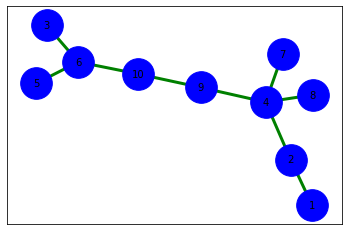

5 : 

{1: 2.0, 2: 4.0, 3: 1.0, 4: 6.0, 5: 0, 6: 3.0, 7: 6.0, 8: 6.0, 9: 5.0, 10: 4.0}


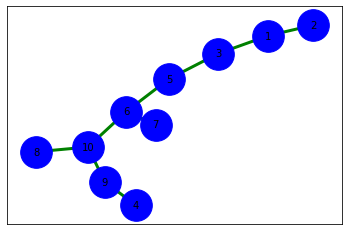

In [17]:
G={1: [2,3,5],
    2: [1,4,7],
    3: [1,4,5,6,9],
    4: [2,3,6,7,8,9],
    5: [1,3,6,9],
    6: [3,4,5,7,10],
    7: [2,4,6,8],
    8: [4,7,10],
    9: [3,4,5,10],
    10: [6,8,9]}
INF = np.inf
weight = np.array([[0,2,1,4,3,INF,INF,INF,INF,INF],#1
                [2,0,INF,3,INF,INF,5,INF,INF,INF],#2
                [1,INF,0, 7,1,2,INF,INF,8,INF],#3
                [4,3,7,0,INF,4,4,3,1,INF],#4
                [3,INF,1,INF,0,3,INF,INF,7,INF],#5
                [INF,INF,2,4,3,0,3,INF,INF,1],#6
                [INF,5,INF,4,INF,3,0,2,INF,INF],#7
                [INF,INF,INF,3,INF,INF,2,0,INF,2],#8
                [INF,INF,8,1,7,INF,INF,INF,0,1],#9
                [INF,INF,INF,INF,INF,1,INF,2,1,0]])#10


# od 0 do max 10
for i in range(3,5):
    val, road = Johnsona(G, weight)[i]
    print("{} : \n".format(i + 1))
    print(val)
    vis_graph(road)

## Przedstawienie drzew rozpinających jako najkrótszej drogi i wartosci dojscia do 
# kolejnych wierzchołków (W razie potrzeby zmienic zakres petli)


## Zadanie 3


e - liczba krawędzi, n - liczba krawedzi <br>

##### Złożoność pamięciowa: <br>
- Złożoność pamięciowa wynika z połączenia złożoności algorytmów O(n) (od algorytmu Bellmana-Forda) kolejnym czynnikiem jest implementacja algorytmu Dijkstry i to ona decyduje z którym przypadkiem mamy do czynienia:
        - optymistyczny: O(e + n * log n) badz O(e * log n) (w zależnoscie od liczby wierzchołków i krawędzi jeden bedzie lepszy)
        - pesymistyczny: O(n^2) (implementacja przez zwykla tablice)

##### Złożoność czasowa <br>
- Dla optymistycznego przypadku wynosi ona : O(n*e + n^2 * log n),
- Złożność zależy znowu od implementacji kolejki priorytetowej, i pogarszają sie wraz z nią, najgorszy przypadek jest gdy stosujemy zwykla tablice do implementacji kolejki
